<a href="https://colab.research.google.com/github/JuanVelandia2702/CIENCIA_DATOS_2025/blob/main/Preguntastitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df = pd.read_csv('/content/drive/MyDrive/titanic.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    int64   
 2   Pclass         891 non-null    int64   
 3   Name           891 non-null    object  
 4   Sex            891 non-null    object  
 5   Age            714 non-null    float64 
 6   SibSp          891 non-null    int64   
 7   Parch          891 non-null    int64   
 8   Ticket         891 non-null    object  
 9   Fare           891 non-null    float64 
 10  Cabin          204 non-null    object  
 11  Embarked       889 non-null    object  
 12  Fare_category  891 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [17]:
#determinar cuantos sobrevivieron
print(df['Survived'].value_counts())
#tasa de supervivencia
print(df['Survived'].value_counts(normalize=True))


Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


##de las 2.224 personas dentro del titanice tenemos datos de 891, sobrevivieron 342 y la tasa global de suoervivencia fue de 38,3838%

In [22]:

# ¿Cuántos pasajeros del Titanic eran hombres y cuántos mujeres?
# ¿Qué se obtiene cuando se desglosa por clase de billete?
df.groupby("Pclass")["Sex"].value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: count, dtype: int64

#Composición de Pasajeros:
Desbalance de género significativo: Había considerablemente más hombres (577) que mujeres (314) en el dataset analizado.

Estructura de clases marcada: La tercera clase era la más numerosa (491), seguida por primera clase (216) y segunda clase (184).

#Distribución Cruzada por Género y Clase:
Primera clase: Relativamente equilibrada en género (94 mujeres vs 122 hombres)

Segunda clase: Ligero predominio masculino (76 mujeres vs 108 hombres)

Tercera clase: Notable desbalance con predominio masculino significativo (144 mujeres vs 347 hombres)

#Implicaciones para la Supervivencia:

Las mujeres y niños tenían prioridad en los botes salvavidas

Los pasajeros de primera clase tenían mejor acceso a las zonas de embarque de botes

La tercera clase, siendo la más numerosa y con mayor proporción de hombres, probablemente enfrentó las tasas de supervivencia más bajas

In [5]:
def bar_char(feature):
  servived=df[df['Survived']==1][feature].value_counts()
  dead=df[df['Survived']==0][feature].value_counts()
  test=pd.DataFrame([servived,dead])
  test.index=['Survived','Dead']
  test.plot(kind='bar',stacked=True,figsize=(10,5))

Pasajeros con información de edad: 714
Pasajeros sin información de edad: 177

Estadísticas de edad:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


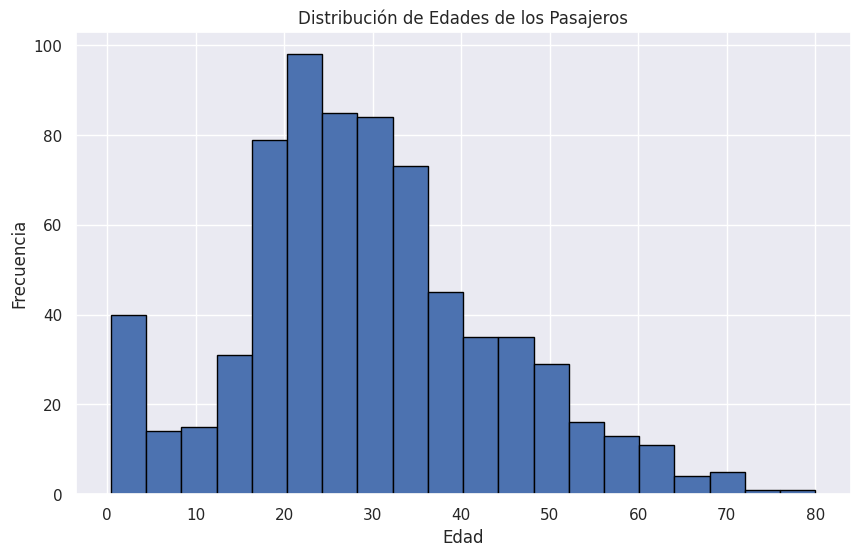

In [23]:
# ¿De cuántos pasajeros tenemos información sobre la edad?
# ¿Para cuántos falta información sobre la edad?
# ¿Cuál es la distribución por edades?
print(f"Pasajeros con información de edad: {df['Age'].notna().sum()}")
print(f"Pasajeros sin información de edad: {df['Age'].isna().sum()}")
print(f"\nEstadísticas de edad:")
print(df['Age'].describe())

# Distribución por edades
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df['Age'].hist(bins=20, edgecolor='black')
plt.title('Distribución de Edades de los Pasajeros')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

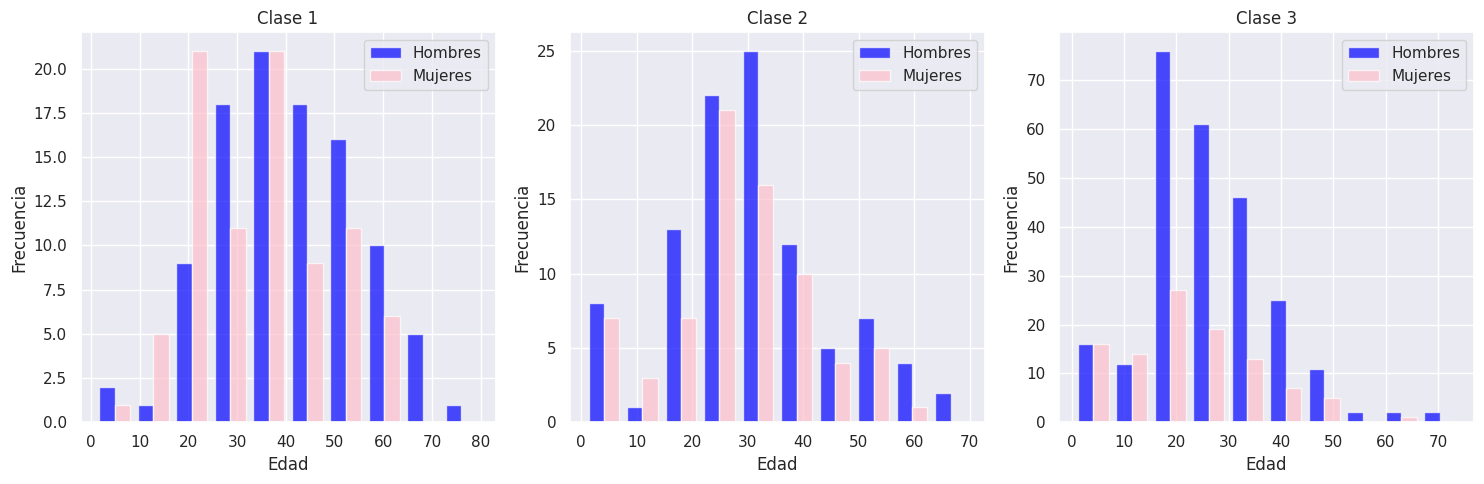

In [25]:
# Versión mínima con histogramas separados
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, clase in enumerate([1, 2, 3]):
    datos_clase = df[df['Pclass'] == clase]
    axes[i].hist([datos_clase[datos_clase['Sex']=='male']['Age'].dropna(),
                 datos_clase[datos_clase['Sex']=='female']['Age'].dropna()],
                alpha=0.7, label=['Hombres', 'Mujeres'], color=['blue', 'pink'])
    axes[i].set_title(f'Clase {clase}')
    axes[i].set_xlabel('Edad')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

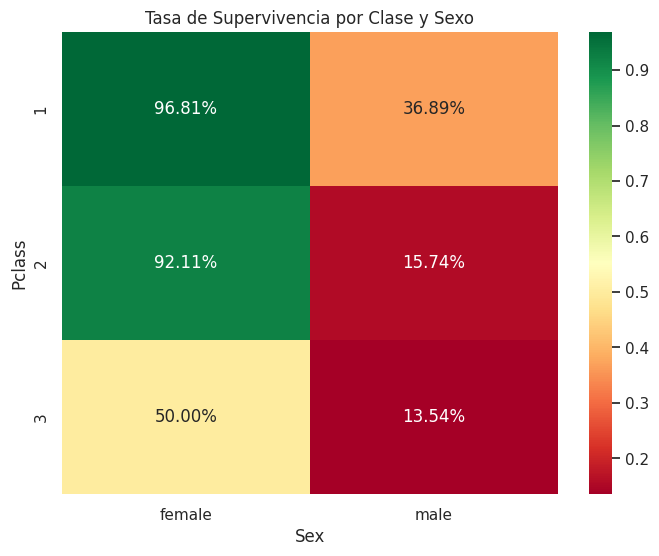

In [28]:
# Pregunta 6
plt.figure(figsize=(12, 8))

supervivencia_por_grupo = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(supervivencia_por_grupo, annot=True, cmap='RdYlGn', fmt='.2%')
plt.title('Tasa de Supervivencia por Clase y Sexo')
plt.show()

In [3]:
df["Fare_category"]=pd.cut(df["Fare"],bins=[0,25,50,100,200,float("inf")],labels=["0-25","25-50","50-100","100-200","200+"],right=False)

Distribución del tamaño familiar:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


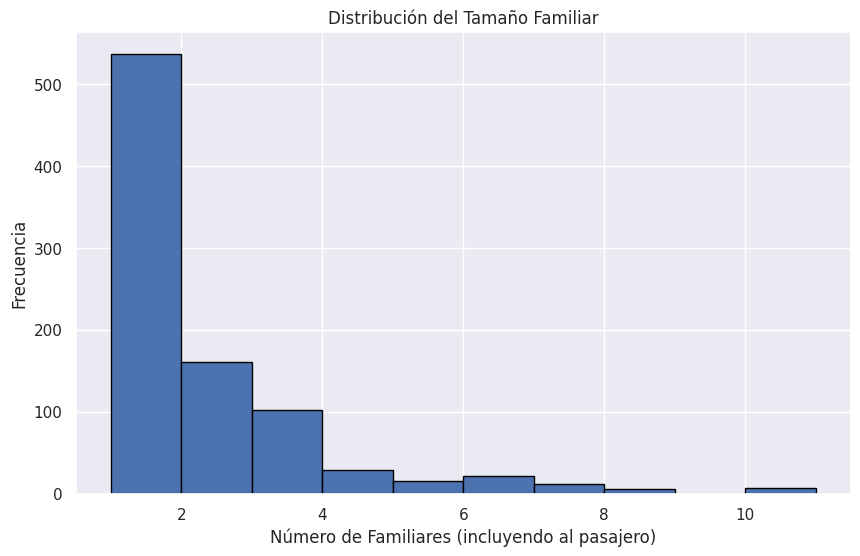


Pasajeros que viajaban solos: 537 (60.3%)
Pasajeros que viajaban con familia: 354 (39.7%)


In [29]:
# Distribución del número de miembros de la familia
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 para incluir al pasajero mismo

print("Distribución del tamaño familiar:")
print(df['FamilySize'].value_counts().sort_index())

plt.figure(figsize=(10, 6))
df['FamilySize'].hist(bins=range(1, 12), edgecolor='black')
plt.title('Distribución del Tamaño Familiar')
plt.xlabel('Número de Familiares (incluyendo al pasajero)')
plt.ylabel('Frecuencia')
plt.show()

# ¿La mayoría de los pasajeros viajaban solos o con familia?
solitarios = (df['FamilySize'] == 1).sum()
con_familia = (df['FamilySize'] > 1).sum()
print(f"\nPasajeros que viajaban solos: {solitarios} ({solitarios/len(df)*100:.1f}%)")
print(f"Pasajeros que viajaban con familia: {con_familia} ({con_familia/len(df)*100:.1f}%)")

In [30]:
# ¿En qué clase de billete viajaron la mayoría de las familias numerosas?
familias_numerosas = df[df['FamilySize'] >= 4]  # Definimos familia numerosa como 4+ personas
print("Familias numerosas por clase:")
print(familias_numerosas['Pclass'].value_counts())

# ¿Qué clase de billete tiene la menor proporción de pasajeras que viajaron solas?
mujeres = df[df['Sex'] == 'female']
mujeres_solas = mujeres[mujeres['FamilySize'] == 1]

prop_mujeres_solas = mujeres_solas.groupby('Pclass').size() / mujeres.groupby('Pclass').size()
print(f"\nProporción de mujeres que viajaban solas por clase:")
print(prop_mujeres_solas)
print(f"\nClase con menor proporción de mujeres solas: Clase {prop_mujeres_solas.idxmin()}")

Familias numerosas por clase:
Pclass
3    63
2    15
1    13
Name: count, dtype: int64

Proporción de mujeres que viajaban solas por clase:
Pclass
1    0.361702
2    0.421053
3    0.416667
dtype: float64

Clase con menor proporción de mujeres solas: Clase 1


In [32]:
# Calcule la tarifa media por persona
ticket_counts = df.groupby('Ticket').size().reset_index(name='PersonasPorTicket')

# Unir esta información al dataframe original
df_with_ticket_count = df.merge(ticket_counts, on='Ticket')

# Calcular tarifa por persona
df_with_ticket_count['FarePerPerson'] = df_with_ticket_count['Fare'] / df_with_ticket_count['PersonasPorTicket']

# Tarifa media por persona
tarifa_media_por_persona = df_with_ticket_count['FarePerPerson'].mean()
print(f"Tarifa media por persona: ${tarifa_media_por_persona:.2f}")


Tarifa media por persona: $17.79


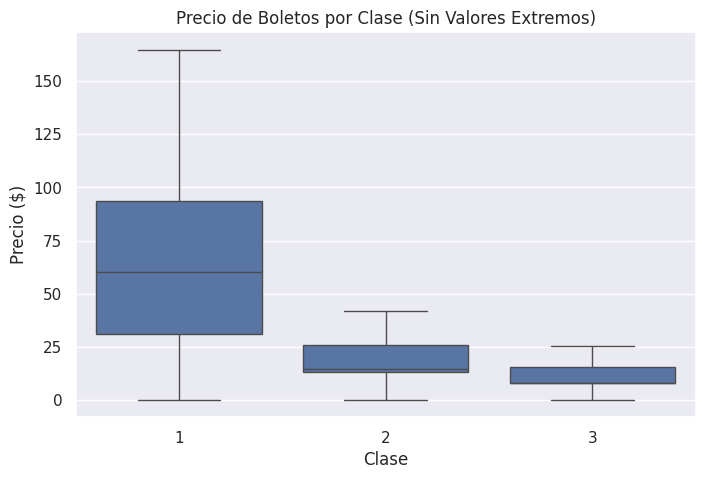

PRECIO PROMEDIO SIN VALORES EXTREMOS:
Clase 1: $64.24
Clase 2: $18.67
Clase 3: $10.29


In [36]:
# Pregunta 10: Precios de boletos por clase (sin valores extremos)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df, showfliers=False)  # showfliers=False elimina los outliers
plt.title('Precio de Boletos por Clase (Sin Valores Extremos)')
plt.xlabel('Clase')
plt.ylabel('Precio ($)')
plt.show()

# También podemos calcular sin outliers
print("PRECIO PROMEDIO SIN VALORES EXTREMOS:")
print("=" * 45)

for clase in [1, 2, 3]:
    precios_clase = df[df['Pclass'] == clase]['Fare']

    # Método 1: Usar rango intercuartílico para eliminar outliers
    Q1 = precios_clase.quantile(0.25)
    Q3 = precios_clase.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    precios_sin_outliers = precios_clase[(precios_clase >= limite_inferior) & (precios_clase <= limite_superior)]

    print(f"Clase {clase}: ${precios_sin_outliers.mean():.2f}")

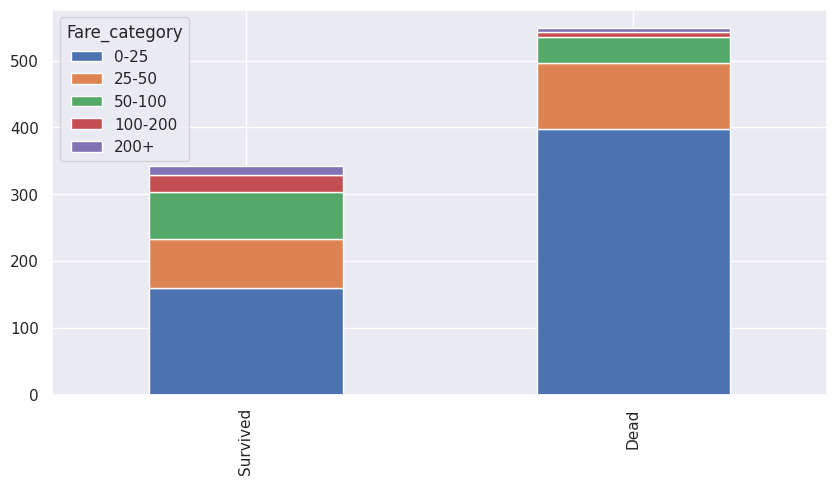

In [6]:
bar_char("Fare_category")